In [ ]:
### Chap 3

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [2]:
### preparing the data:
import numpy as np

### data là 1 câu review được mã hóa, mỗi từ = 1 số (trong 10000 từ). Vì vậy ta tạo vector 1-hots
### để cho các review đều có độ dài giống nhau (= 10000). Từ nào xuất hiện sẽ = 1.

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
### Building network
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.5342 - binary_accuracy: 0.7747 - val_loss: 0.3972 - val_binary_accuracy: 0.8650
Epoch 2/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.3177 - binary_accuracy: 0.8976 - val_loss: 0.3270 - val_binary_accuracy: 0.8718
Epoch 3/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.2341 - binary_accuracy: 0.9249 - val_loss: 0.2860 - val_binary_accuracy: 0.8878
Epoch 4/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1843 - binary_accuracy: 0.9397 - val_loss: 0.2744 - val_binary_accuracy: 0.8899
Epoch 5/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1527 - binary_accuracy: 0.9505 - val_loss: 0.2995 - val_binary_accuracy: 0.8806
Epoch 6/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1227 - bin

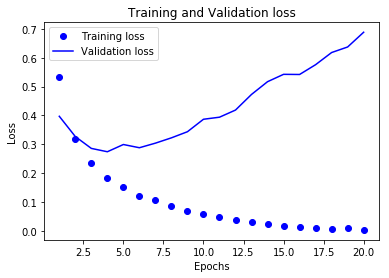

In [8]:
## plot 
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
validate_loss_value = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, validate_loss_value, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

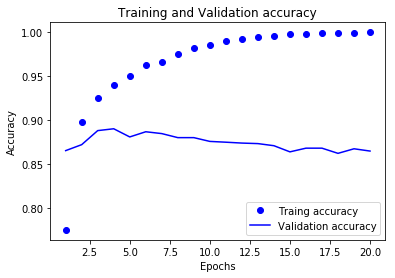

In [12]:
plt.clf()
acc_values = history_dict['binary_accuracy']
validate_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Traing accuracy')
plt.plot(epochs, validate_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model.predict(x_test)

array([[0.01151004],
       [1.        ],
       [0.9916611 ],
       ...,
       [0.0086242 ],
       [0.09088188],
       [0.9729741 ]], dtype=float32)